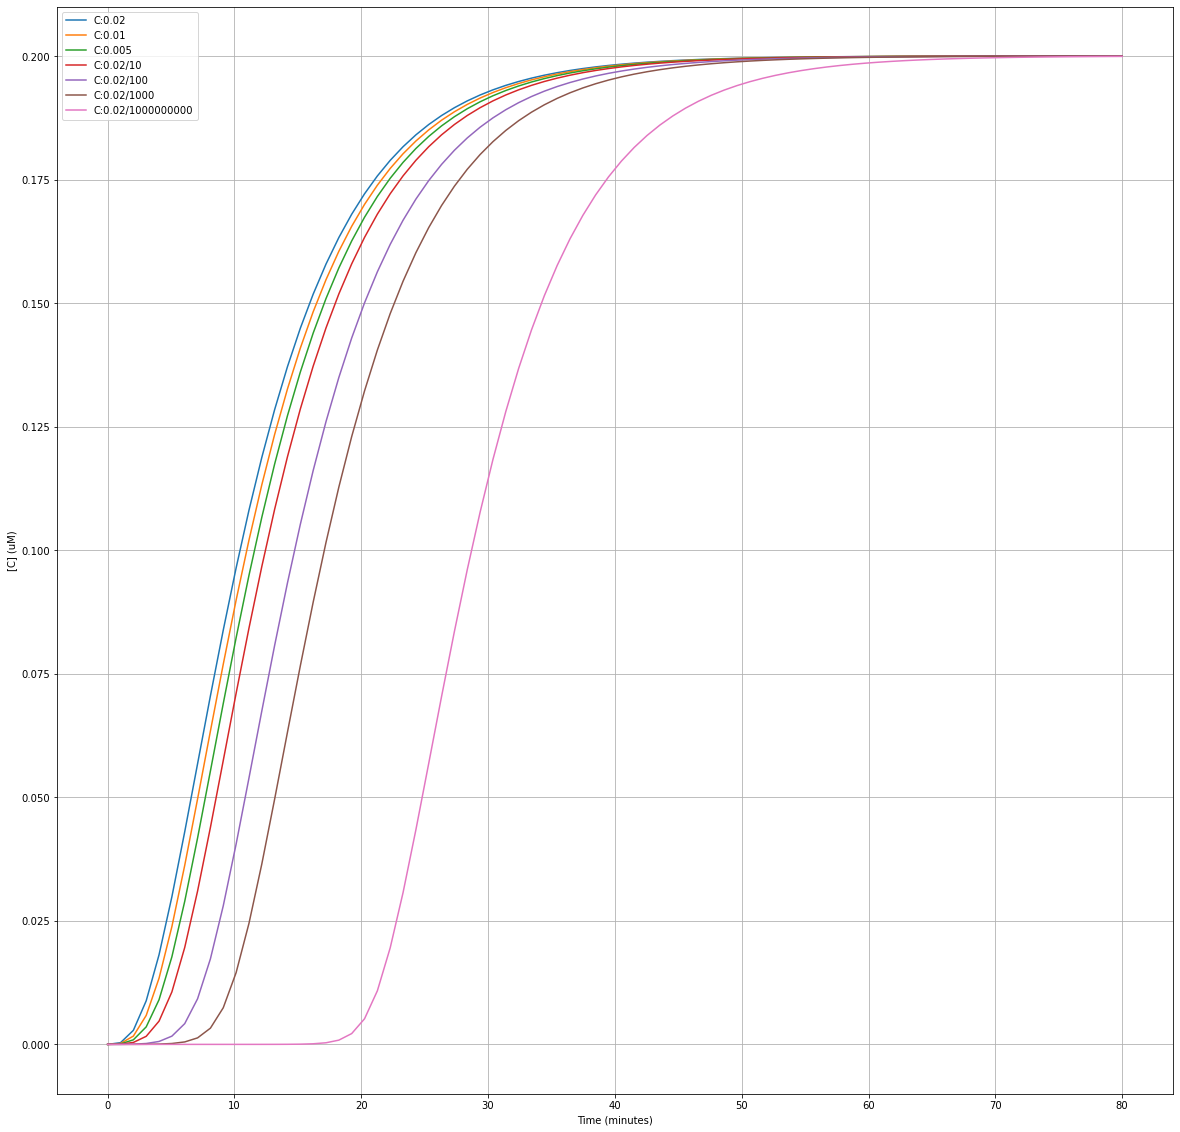

In [8]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

#import data
df = pd.read_excel('ModelingNRLData.xlsx')
Time=df['Time'].values.tolist()
Concentration=df['B'].values.tolist()

# Catalyst + HC -> CHC (k0)
# CHC + H1 -> CH1 (k1)
# H2 + CH1 -> CH1H2 + Catalyst (k2)
# CH1CH2 +RP-> RF+ RQ (k3)

#Normalize data
def normalizedata(concentration):
    data=[]
    for i in concentration:
        data.append(i*0.2)
    return data

#function to solve differential equations of the system
def cha(y, t, k0, k1, k2, k3):
    ca, hc, chc, h1, ch1, h2, ch1h2, rp, rf = y
    dydt =  [-k0*ca*hc+k2*h2*ch1, -k0*ca*hc, k0*ca*hc, -k1*h1*chc, k1*h1*chc, -k2*h2*ch1, k2*h2*ch1, -k3*ch1h2*rp, k3*ch1h2*rp]
    return dydt

#Set the initial concentration [ca, hc, chc, h1, ch1, h2, ch1h2, rp, rf]
y0=[0.02, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
y1=[0.01, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
y2=[0.005, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
y3=[0.02/10, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
y4=[0.02/100, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
y5=[0.02/1000, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
y6=[0.02/1000000000, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]

#Set time scale
t = np.linspace(0, 80, 80)

sol = odeint(cha, y0, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
sol1 = odeint(cha, y1, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
sol2 = odeint(cha, y2, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
sol3 = odeint(cha, y3, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
sol4 = odeint(cha, y4, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
sol5 = odeint(cha, y5, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))
sol6 = odeint(cha, y6, t, args=(49.90000000000014, 26.300000000000033, 1.0, 0.7000000000000001))

#Label for graphs
lca = "CAT(t)"
lh1 = "H1(t)"
lch1 = "CH1(t)"
xla = "Time (minutes)"
yla = "[C] (uM)"
lh2 = "H2(t)"
lch1h2 = "CH1H2(t)"
lrp = "RP(t)"
lrf = "C:0.02"
lrf1 = "C:0.01"
lrf2 = "C:0.005"
lrf3 = "C:0.02/10"
lrf4 = "C:0.02/100"
lrf5 = "C:0.02/1000"
lrf6 = "C:0.02/1000000000"

#Plotting
plt.figure(figsize=(20,20))
#plt.scatter(x=Time,y=normalizedata(Concentration))
plt.plot(t, sol[:, 8], label = lrf)
plt.plot(t, sol1[:, 8], label = lrf1)
plt.plot(t, sol2[:, 8], label = lrf2)
plt.plot(t, sol3[:, 8], label = lrf3)
plt.plot(t, sol4[:, 8], label = lrf4)
plt.plot(t, sol5[:, 8], label = lrf5)
plt.plot(t, sol6[:, 8], label = lrf6)
plt.legend(loc='best')
plt.xlabel(xla)
plt.ylabel(yla)
plt.grid()
plt.savefig("ModelPLot.pdf")
plt.show()